In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
color_pal = sns.color_palette()

In [3]:
df = pd.read_csv('PJME_hourly.csv')

In [4]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [5]:
print(type(df['Datetime'].values))

<class 'numpy.ndarray'>


In [6]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [7]:
print(type(df['Datetime']))

<class 'pandas.core.series.Series'>


In [8]:
df = df.set_index('Datetime')

In [9]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


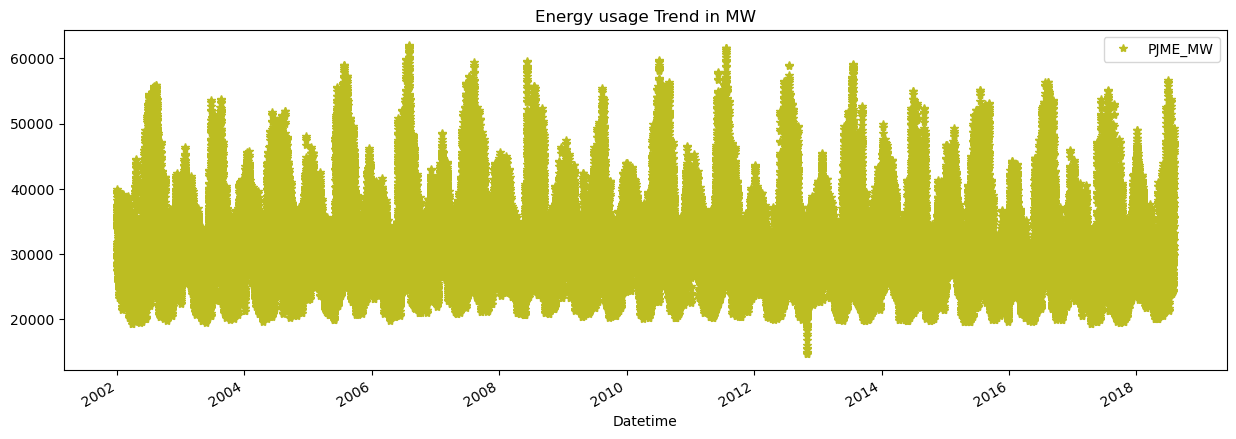

In [10]:
df.plot(style='*',figsize=(15,5),title='Energy usage Trend in MW',color = color_pal[8])
plt.show()

In [11]:
train = df.loc[df.index < '01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [12]:
train

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0


In [13]:
test

,PJME_MW
Datetime,
2015-01-01 00:00:00,32802.0
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


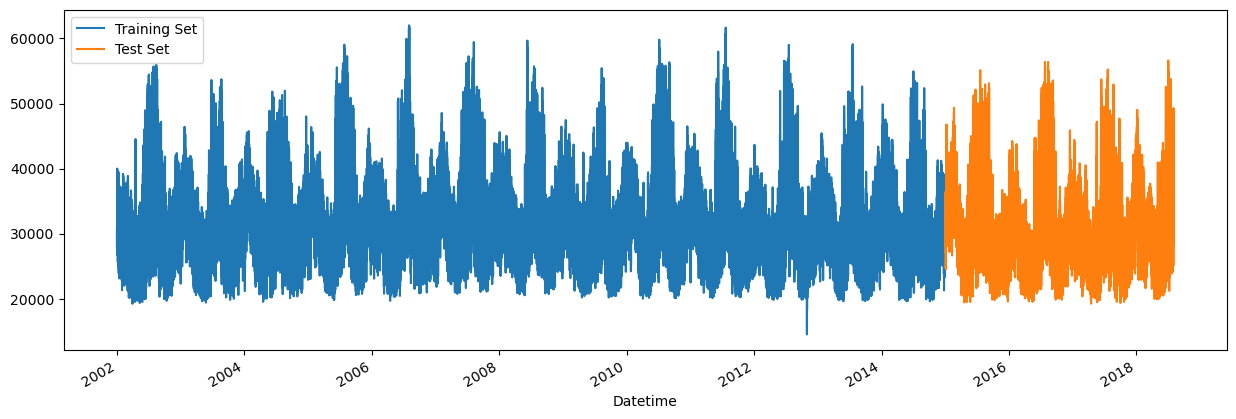

In [14]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax , label = ' Training Data ')
test.plot(ax=ax , label = ' Test Data ')
ax.legend   (['Training Set','Test Set'])
plt.show()

In [15]:
jan_first_week = df.loc[(df.index > '01-01-2010') &
                        (df.index < '01-08-2010')]


<AxesSubplot:title={'center':'January First Week Trend'}, xlabel='Datetime'>

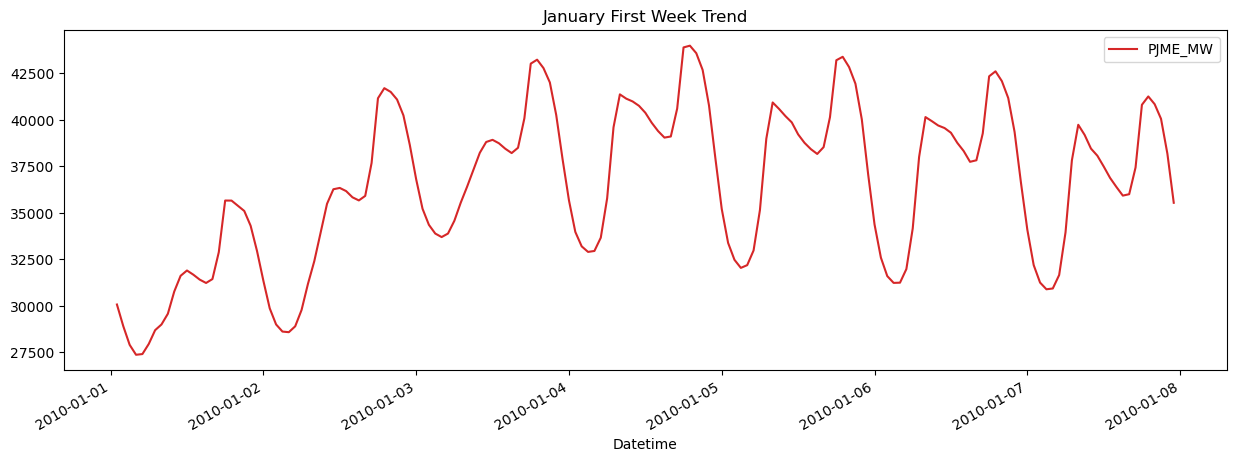

In [16]:
jan_first_week.plot(figsize=(15,5),title = 'January First Week Trend',
                    color = color_pal[3])

In [21]:
def create_features(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day_of_week
    df['month'] = df.index.month
    df['Quarter'] = df.index.quarter
    df['year'] = df.index.year
    df['weekday'] = df.index.weekday
    df['day_of_the_year'] = df.index.day_of_year
    return df 

In [22]:
df.head()

,PJME_MW,hour,day,month,year,weekday,day_of_the_year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,2002,1,365
2002-12-31 02:00:00,25147.0,2,1,12,2002,1,365
2002-12-31 03:00:00,24574.0,3,1,12,2002,1,365
2002-12-31 04:00:00,24393.0,4,1,12,2002,1,365
2002-12-31 05:00:00,24860.0,5,1,12,2002,1,365


In [23]:
df = create_features(df)

In [24]:
df.head()

,PJME_MW,hour,day,month,year,weekday,day_of_the_year,Quarter
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,12,2002,1,365,4
2002-12-31 02:00:00,25147.0,2,1,12,2002,1,365,4
2002-12-31 03:00:00,24574.0,3,1,12,2002,1,365,4
2002-12-31 04:00:00,24393.0,4,1,12,2002,1,365,4
2002-12-31 05:00:00,24860.0,5,1,12,2002,1,365,4


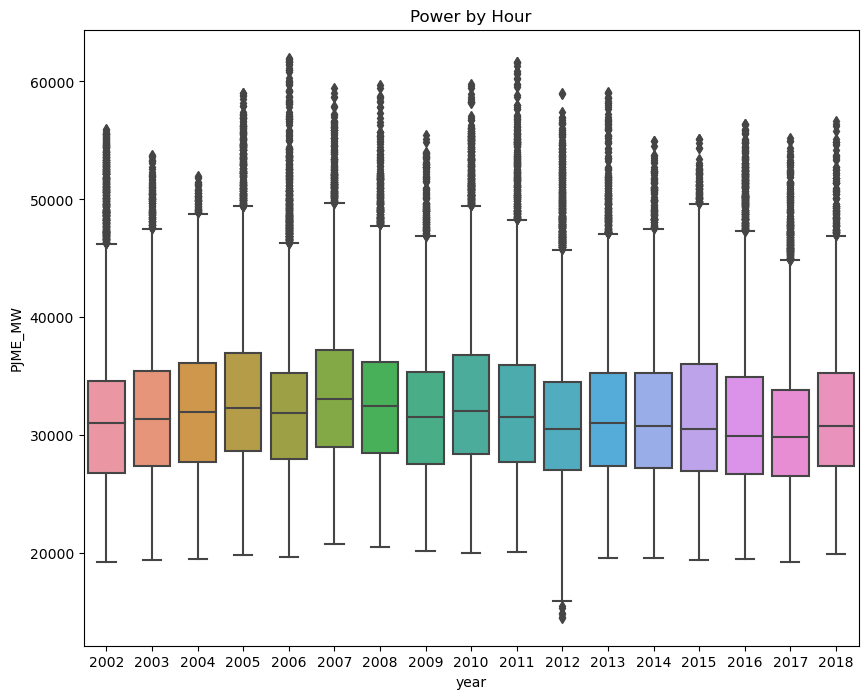

In [28]:
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x = 'year', y = 'PJME_MW')
ax.set_title('Power by Hour')
plt.show()

In [29]:
train = create_features(train)
test = create_features(test)

C:\Users\sengu\AppData\Local\Temp\ipykernel_20872\567310760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\sengu\AppData\Local\Temp\ipykernel_20872\567310760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df.index.day_of_week
C:\Users\sengu\AppData\Local\Temp\ipykernel_20872\567310760.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [30]:
df.columns

Index(['PJME_MW', 'hour', 'day', 'month', 'year', 'weekday', 'day_of_the_year',
       'Quarter'],
      dtype='object')

In [31]:
features = ['hour', 'day', 'month', 'year', 'weekday', 'day_of_the_year',
       'Quarter' ]

In [35]:
target = ['PJME_MW']
xtrain = train[features]
ytrain = train[target]
xtest = test[features]
ytest = test[target]

In [36]:
reg = xgb.XGBRFRegressor(n_estimators = 1000)
model = reg.fit(xtrain,ytrain)

In [37]:
model.score(xtest,ytest)

0.6147545315867782